In [1]:
import numpy as np
import pandas as pd
from typing import Tuple
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
plt.style.use('ggplot')

具体说明见**ex1.pdf**

# Linear regression with one variable

>The ﬁle **ex1data1.txt** contains the dataset for our linear regression prob-
lem. The ﬁrst column is the population of a city and the second column is
the proﬁt of a food truck in that city.

In [2]:
# 数据加载
# np.genfromtxt('ex1data1.txt',delimiter=',')
data_1 = pd.read_csv('ex1data1.txt',header=None)
# X为population,y为prfit
data_1.columns = ['population','profit']
# 查看数据结构
data_1.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Plotting the Data

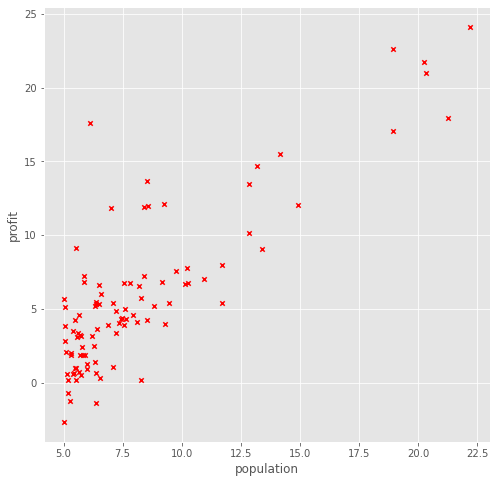

In [3]:
# 查看数据分布
data_1.plot.scatter(x="population",y="profit",marker='x',color='red',figsize=(8,8))

## Gradient Descent

hypothesis function:

$h(\theta)=\theta^{T}X=\theta_0+\theta_1x_1$

cost function:

$J(\theta)=\frac{1}{2m}\sum^{m}_{i=1}(h_\theta(x^{(i)})-y^{(i)})^2$

gradient descent:

$\theta_j := \theta_j-\alpha\frac{1}{m}\sum^{m}_{i=1}(h_\theta(x^{(i)}-y^{(i)})x^{(i)}_{j}  $

In [5]:
# 代价函数
def computeCost(X:np.array,y:np.array,theta:list)->float:

    m = len(X)
    
    hypothesis_fun = X @ theta
    resid = hypothesis_fun - y
    
    return (1 / (2 * m)) * np.sum(resid ** 2)

# 梯度下降函数
def gradientDescent(X:np.array,y:np.array,theta:list,alpha:float,iter_num:int)->Tuple[list,np.array]:
    '''
    return
    --------------
        theta,J_history
    '''
    m = len(X)
    
    J_history = np.zeros(iter_num)
    
    for i in range(iter_num):
        
        hypothesis_fun = X @ theta
        resid = hypothesis_fun - y
        
        x = X[:,1]
        
        theta[0] = theta[0] - alpha * (1 / m) *  np.sum(resid)
        # 行向量 与 列向量的内积比 两个行向量的乘法在求和快
        theta[1] = theta[1] - alpha * (1 / m) *  (x @ resid)

        J_history[i] = computeCost(X,y,theta)
        
    return (theta,J_history)

In [6]:
X = np.vstack([np.ones(data_1.shape[0]),data_1.loc[:,'population']]).T # 添加Constant
y = data_1.loc[:,'profit'].values
theta = np.zeros(2)

iterations = 1500
alpha = 0.01

theta,j_history = gradientDescent(X, y, theta, alpha, iterations)

## Debugging

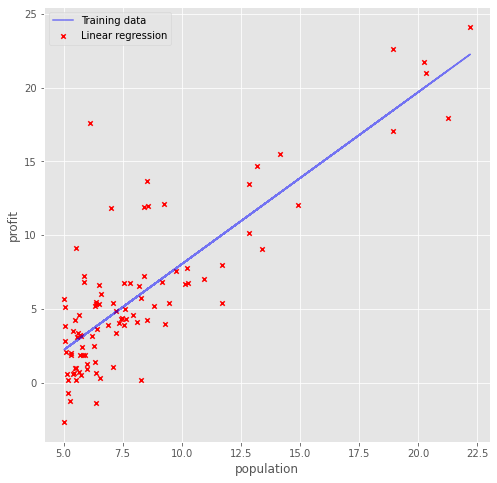

In [7]:
# 查看数据分布
data_1.plot.scatter(x="population",y="profit",marker='x',color='red',figsize=(8,8))
plt.plot(X[:,1],np.dot(X,theta),color='b',alpha=0.5)
plt.legend(['Training data', 'Linear regression'],loc='upper left')

## Visualizing J(θ)

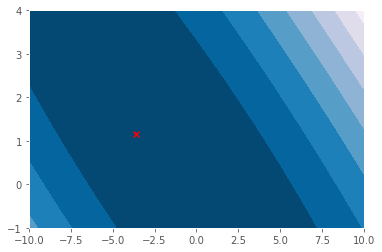

In [8]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [theta0_vals[i],theta1_vals[j]]
        J_vals[i,j] = computeCost(X, y, t)

plt.contourf(theta0_vals, theta1_vals,J_vals,cmap=cm.PuBu_r)
plt.scatter(theta[0], theta[1], marker='x', color='r')

# Linear regression with multiple variables

The ﬁle ex1data2.txt contains a training set of housing prices in Port-land, Oregon. The ﬁrst column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price of the house.

In [9]:
# 数据加载
data_2 = pd.read_csv('ex1data2.txt',header=None)

# 查看数据结构
data_2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


**代价函数**

$J(\theta) = \frac{1}{2m}(X\theta-\vec{y})^T(X\theta-\vec{v}))$


In [10]:
# 归一化函数
def featureNormalize(X: np.array) -> Tuple[np.array, np.array, np.array]:

    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    X_norm = X
    for i in range(X.shape[1]):

        mu[i] = np.mean(X_norm[:, i])
        sigma[i] = np.std(X_norm[:, i])

        X_norm[:, i] = (X_norm[:, i] - mu[i]) / sigma[i]

    return (X_norm, mu, sigma)

# 代价函数
def computeCostMulti(X: np.array, y: np.array, theta: np.array) -> float:

    m = X.shape[0]
    # np.dot(行向量,列向量)

    return (1 / 2 * m) * (X @ theta - y) @ (X @ theta -y).T

# 梯度下降
def gradientDescentMulti(X: np.array, 
                         y: np.array, 
                         theta: np.array, 
                         alpha: float, 
                         num_iters: int) -> Tuple[np.array, np.array]:

    m = X.shape[0]
    
    x_num = X.shape[1]
    
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        
        hypothesis_fun = np.dot(X,theta)
        resid = np.array(hypothesis_fun - y)
        
        for j in range(x_num):
            
            x = X[:,j]

            theta[j] = theta[j] - alpha * (1 / m) *  np.dot(x, np.array([resid]).T)[0]
        
        J_history[i] = computeCostMulti(X, y, theta)
            
    
    return (theta,J_history)
            

##  Normal Equations

$\theta = (X^TX)^{-1}X^T\vec{y}$

In [11]:
#  Normal Equations
def normalEqn(X:np.array,y:np.array)->list:

    X_t = np.transpose(X)

    return np.linalg.pinv(X_t @ X) @ X_t @ y

## Gradient Descent

In [12]:
X = data_2.iloc[:,:-1].values
y = data_2.iloc[:,-1].values
X,mu,sigma = featureNormalize(X) # 标准化
X = np.c_[np.ones(X.shape[0]),X] # 添加Constant

In [13]:
# 正规方程求解
theta = normalEqn(X,y)

print(theta)

[324486.68818838 123693.06633751  16256.91543233]


In [14]:
# Choose some alpha value
alpha = 0.01
num_iters = 2000

# Init Theta and Run Gradient Descent 
theta = np.zeros(3)

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

In [15]:
theta

array([324469.42516107, 123451.49720965,  16480.45923108])

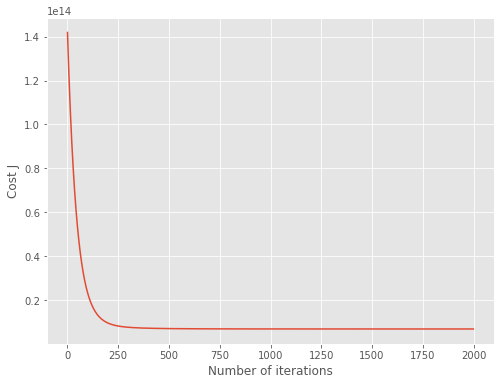

In [16]:
plt.figure(figsize=(8,6))
plt.plot(range(len(J_history)),J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()